<a href="https://colab.research.google.com/github/sweetyjunnarkar/Terrorism-around-the-Globe/blob/main/Sweety_Junnarkar_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Setting Data**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

terror=pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/dat/Copy of globalterrorismdb_0718dist.csv',encoding = "cp1252",low_memory=False)

In [4]:
terror.head()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...        0         0       0      NaN
1  197000000002   1970       0     0  ...        1         1       1      NaN
2  197001000001   1970       1     0  ...       -9         1       1      NaN
3  197001000002   1970       1     0  ...       -9         1       1      NaN
4  197001000003   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

In [5]:
terror_df=terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
terror_df=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [7]:
terror_df.head(2)

Year  Month  Day  ... Weapon_type Motive success
0  1970      7    2  ...     Unknown    NaN       1
1  1970      0    0  ...     Unknown    NaN       1

[2 rows x 18 columns]

In [8]:
terror_df["Casualities"]=terror_df['Killed']+terror_df['Wounded']

In [9]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  success      181691 non-null  int64  
 18  Casualities  164817 non-

In [10]:
terror_df.describe()

Year          Month  ...        success    Casualities
count  181691.000000  181691.000000  ...  181691.000000  164817.000000
mean     2002.638997       6.467277  ...       0.889598       5.296128
std        13.259430       3.388303  ...       0.313391      42.069023
min      1970.000000       0.000000  ...       0.000000       0.000000
25%      1991.000000       4.000000  ...       1.000000       0.000000
50%      2009.000000       6.000000  ...       1.000000       1.000000
75%      2014.000000       9.000000  ...       1.000000       4.000000
max      2017.000000      12.000000  ...       1.000000    9574.000000

[8 rows x 9 columns]

# **Analyzing Data Globally**

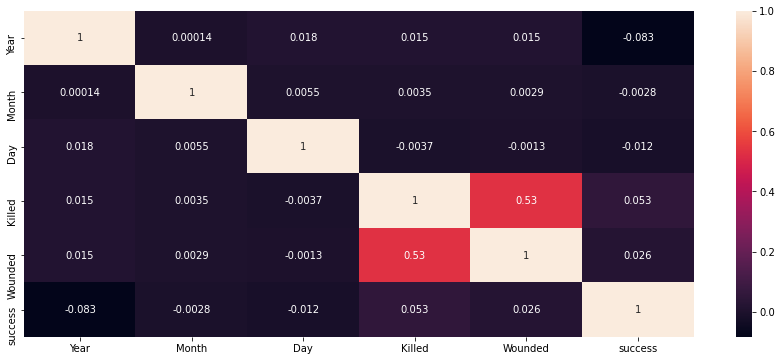

In [11]:
corr_df=terror_df[['Year','Month','Day','Killed','Wounded','success']]
corr=corr_df.corr()
plt.subplots(figsize=(15,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

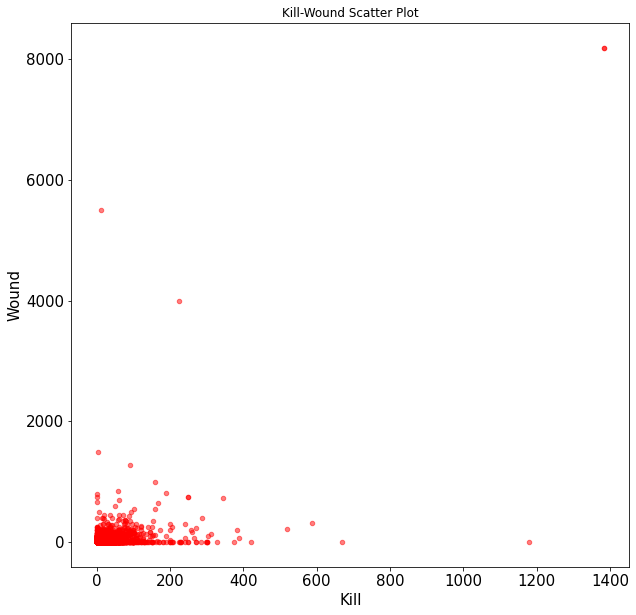

In [12]:
terror_df.plot(kind = 'scatter', x = 'Killed', y = 'Wounded', alpha = 0.5, color = 'red', figsize = (10,10), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill-Wound Scatter Plot')
plt.show()


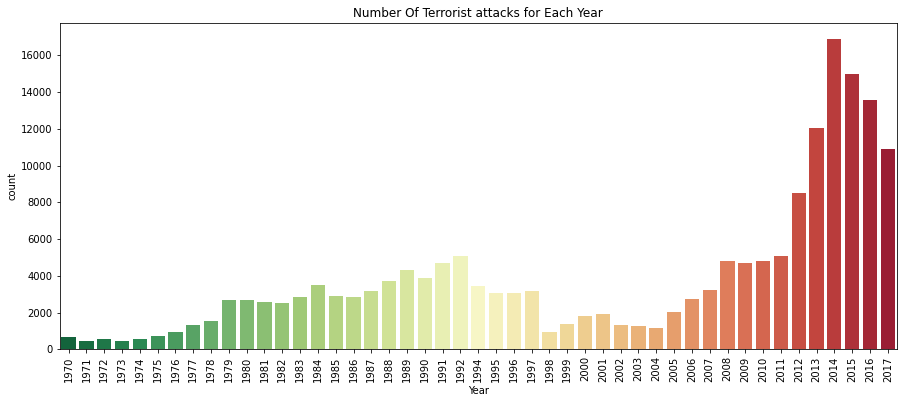

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist attacks for Each Year')
plt.show()

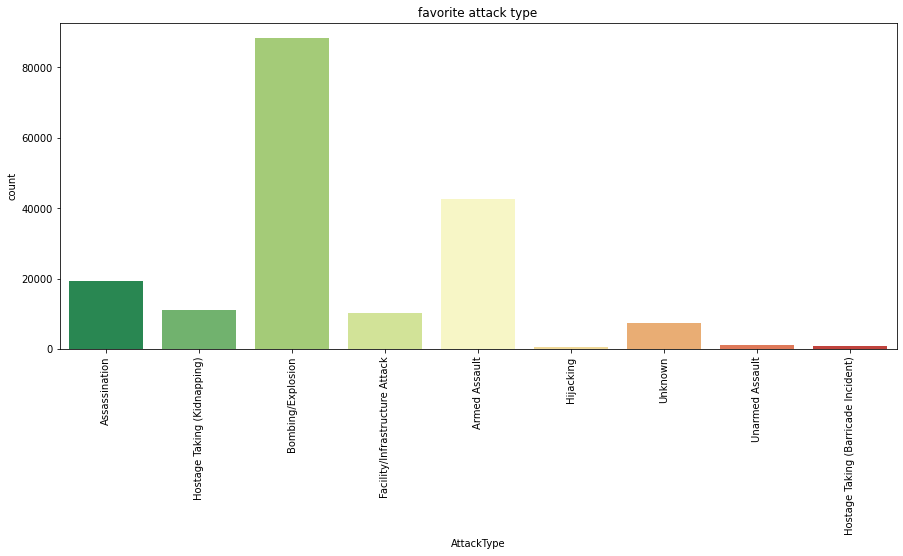

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('favorite attack type')
plt.show()

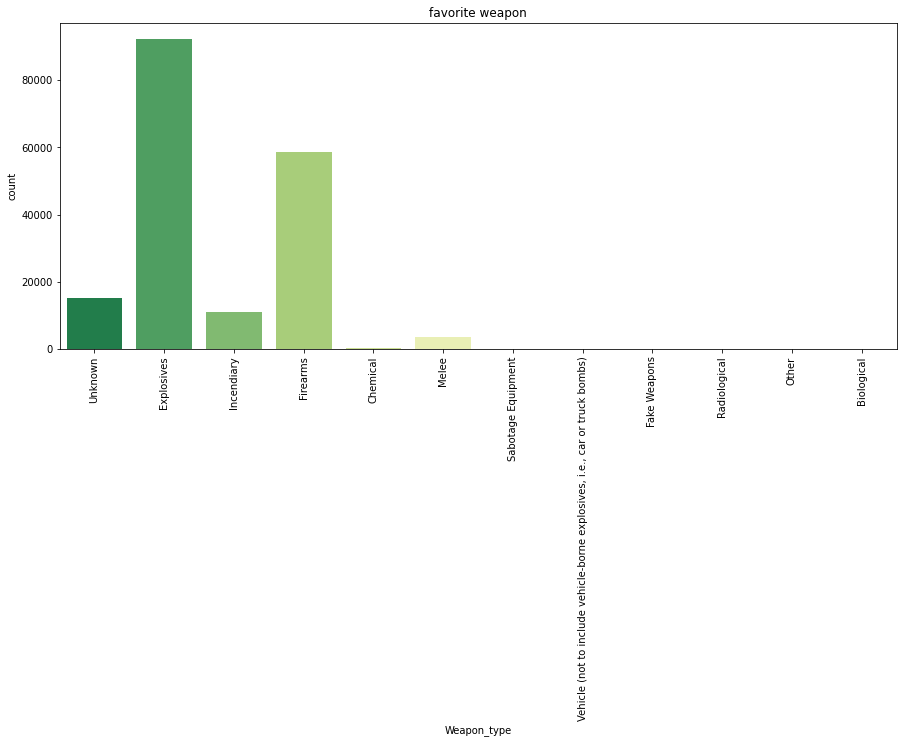

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot('Weapon_type',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('favorite weapon')
plt.show()

In [16]:
terror_fol=terror_df.copy()
terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_fol=terror_fol[['latitude','longitude']][:5000]
country_fol=terror_fol['Country'][:5000]
city_fol=terror_fol['city'][:5000]
killed_fol=terror_fol['Killed'][:5000]
wound_fol=terror_fol['Wounded'][:5000]
def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='green'
    return color   
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   
map2 = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
for point in location_fol.index:
    info='<b>Country: </b>'+str(country_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map2)
map2

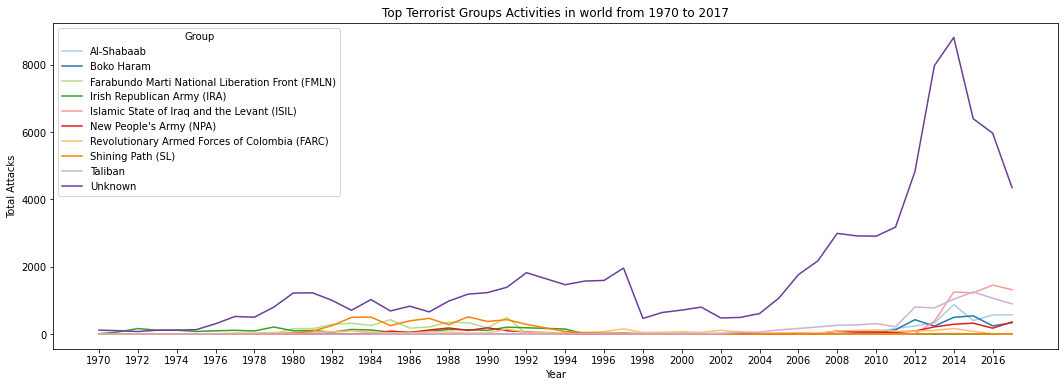

In [17]:
# global_attacks = terror_df[terror_df.Country=='Iraq'].reset_index()
global_groups_10 = terror_df[terror_df.Group.isin(terror_df.Group.value_counts()[0:10].index)]
pd.crosstab(global_groups_10.Year, global_groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017,2))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities in world from 1970 to 2017')
plt.show()

In [18]:
def global_attack_info(df):

  return(f"""
      There are {df.Country.nunique()} countries from {df.Region.nunique()} regions covered in the dataset and terrorist attacks data in {df.Year.nunique()}
      years from {df.Year.min()} to {df.Year.max()}. Overall {df.index.nunique()} terrorist attacks are recorded here which caused about {int(df.Casualities.sum())} casualities
      consisted of {int(df.Killed.sum())} kills and {int(df.Wounded.sum())} wounded.
  """)

In [19]:
print(global_attack_info(terror_df))


      There are 205 countries from 12 regions covered in the dataset and terrorist attacks data in 47
      years from 1970 to 2017. Overall 181691 terrorist attacks are recorded here which caused about 872892 casualities
      consisted of 411868 kills and 523869 wounded.
  


# **maximum attacked country-Iraq**

In [20]:
max_attack_year_df=terror_df[terror_df['Year']==2014]
max_attack_year_df

Year  Month  ...  success Casualities
125335  2014      1  ...        1         0.0
125336  2014      1  ...        1        24.0
125337  2014      1  ...        1        34.0
125338  2014      1  ...        0         0.0
125339  2014      1  ...        1         NaN
...      ...    ...  ...      ...         ...
142236  2014     12  ...        0         0.0
142237  2014     12  ...        1         1.0
143507  2014     12  ...        1         5.0
143727  2014     12  ...        1        34.0
144629  2014     12  ...        1         NaN

[16903 rows x 19 columns]

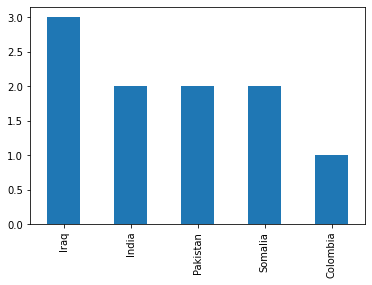

In [21]:
max_attack_year_df['Country'][0:10].value_counts().plot(kind='bar')

In [22]:
max_attacks_country=max_attack_year_df.loc[terror_df['Killed'].idxmax()].Country
max_attacks_country

'Iraq'

In [23]:
Iraq_df=max_attack_year_df[max_attack_year_df['Country']==max_attacks_country]
Iraq_df.head()

Year  Month  ...  success Casualities
125340  2014      1  ...        1         8.0
125341  2014      1  ...        1         5.0
125342  2014      1  ...        1        16.0
125347  2014      1  ...        1         0.0
125348  2014      1  ...        1         1.0

[5 rows x 19 columns]

In [24]:
Iraq_df['Region'].value_counts()

Middle East & North Africa    3933
Name: Region, dtype: int64

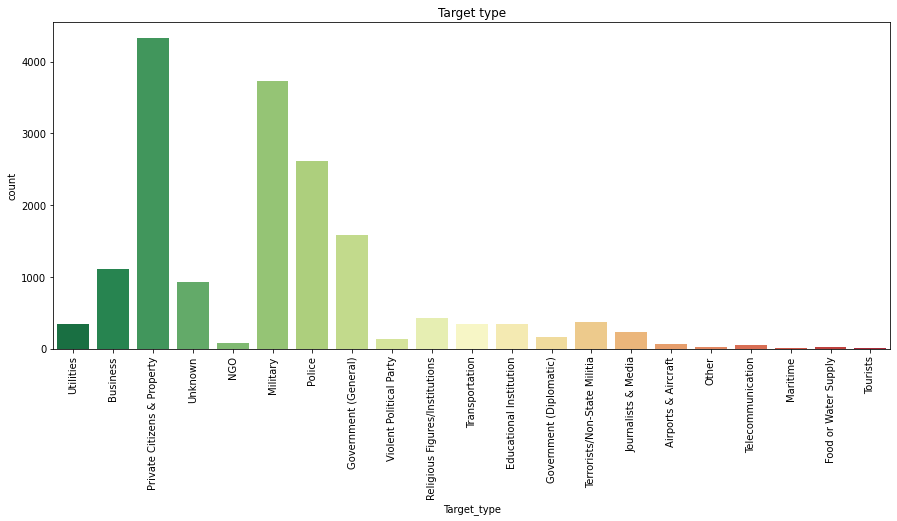

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=max_attack_year_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Target type')
plt.show()

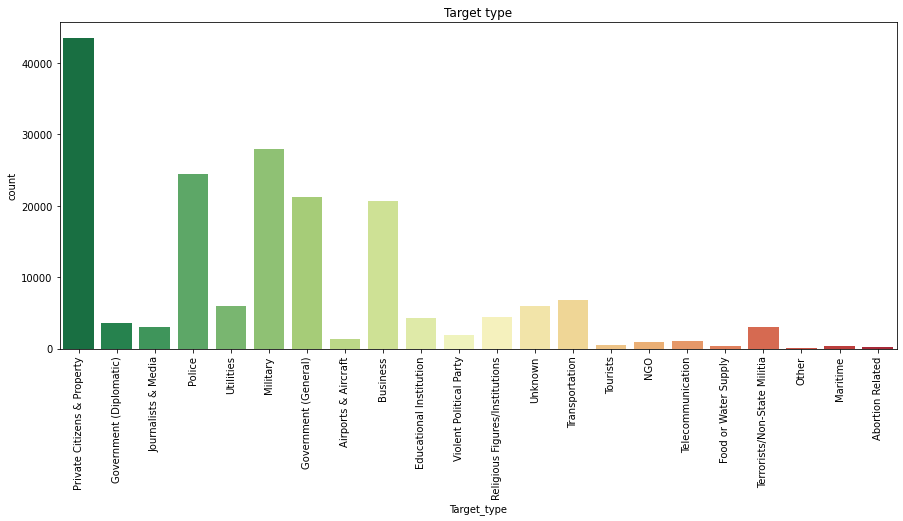

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=terror_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Target type')
plt.show()

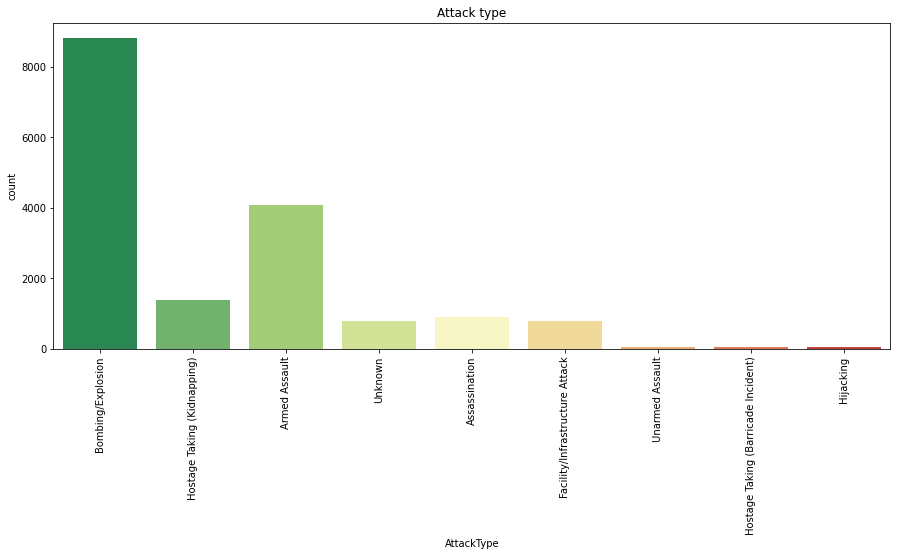

In [27]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=max_attack_year_df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Attack type')
plt.show()

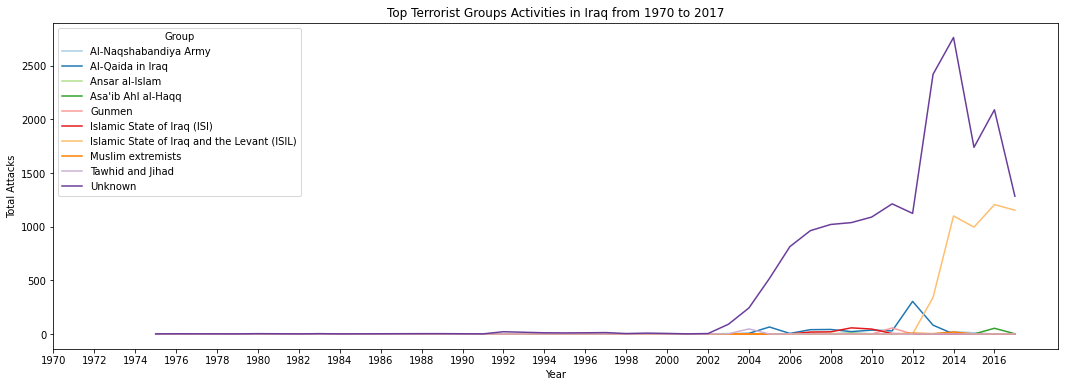

In [28]:
iraq_attacks = terror_df[terror_df.Country=='Iraq'].reset_index()
Iraq_groups_10 = iraq_attacks[iraq_attacks.Group.isin(iraq_attacks.Group.value_counts()[0:10].index)]
pd.crosstab(Iraq_groups_10.Year, Iraq_groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017,2))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities in Iraq from 1970 to 2017')
plt.show()